In [45]:
import numpy as np

In [46]:
import math

In [47]:
import matplotlib.pyplot as plt

In [48]:
import sympy

In [49]:
from sympy import *

In [50]:
n1 = 1/(3**(0.5))
n2 = 1/(3**(0.5))
n3 = 1/(3**(0.5))
t = 0
XX = Symbol('XX')
YY = Symbol('YY')
ZZ = Symbol('ZZ')
YZ = Symbol('YZ')
C = Symbol('C')
S = Symbol('S')

T = Matrix([[n1**(2)*(1-np.cos(np.radians(t)))+np.cos(np.radians(t)), n1*n2*(1-np.cos(np.radians(t)))-n3*np.sin(np.radians(t)), n1*n3*(1-np.cos(np.radians(t)))+n2*np.sin(np.radians(t))], 
            [n1*n2*(1-np.cos(np.radians(t)))+n3*np.sin(np.radians(t)), n2**(2)*(1-np.cos(np.radians(t)))+np.cos(np.radians(t)), n2*n3*(1-np.cos(np.radians(t)))-n1*np.sin(np.radians(t))], 
            [n1*n3*(1-np.cos(np.radians(t)))-n2*np.sin(np.radians(t)), n2*n3*(1-np.cos(np.radians(t)))+n1*np.sin(np.radians(t)), n3**(2)*(1-np.cos(np.radians(t)))+np.cos(np.radians(t))]])
A1 = sympy.Matrix([[XX, 0, 0], [0, YY, YZ], [0, YZ, ZZ]])
A2 = sympy.Matrix([[(XX+3*YY)/4, 3**(0.5)*(XX-YY)/4, 3**(0.5)*YZ/2], [3**(0.5)*(XX-YY)/4, (3*XX+YY)/4, -YZ/2], [3**(0.5)*YZ/2, -YZ/2, ZZ]])
A3 = sympy.Matrix([[(XX+3*YY)/4, 3**(0.5)*(YY-XX)/4, -3**(0.5)*YZ/2], [3**(0.5)*(YY-XX)/4, (3*XX+YY)/4, -YZ/2], [-3**(0.5)*YZ/2, -YZ/2, ZZ]])
h1 = sympy.Matrix([[C, S, 0]])
h2 = sympy.Matrix([[C], [S], [0]])

f1 = T*A1*T**(-1)
f2 = T*A2*T**(-1)
f3 = T*A3*T**(-1)

xy1 = h1*f1*h2
xy2 = h1*f2*h2
xy3 = h1*f3*h2

print(f1)
print(f2)
print(f3)

print(xy1)
print(xy2)
print(xy3)

Matrix([[1.0*XX, 0, 0], [0, 1.0*YY, 1.0*YZ], [0, 1.0*YZ, 1.0*ZZ]])
Matrix([[0.25*XX + 0.75*YY, 0.433012701892219*XX - 0.433012701892219*YY, 0.866025403784439*YZ], [0.433012701892219*XX - 0.433012701892219*YY, 0.75*XX + 0.25*YY, -0.5*YZ], [0.866025403784439*YZ, -0.5*YZ, 1.0*ZZ]])
Matrix([[0.25*XX + 0.75*YY, -0.433012701892219*XX + 0.433012701892219*YY, -0.866025403784439*YZ], [-0.433012701892219*XX + 0.433012701892219*YY, 0.75*XX + 0.25*YY, -0.5*YZ], [-0.866025403784439*YZ, -0.5*YZ, 1.0*ZZ]])
Matrix([[1.0*C**2*XX + 1.0*S**2*YY]])
Matrix([[C*(C*(0.25*XX + 0.75*YY) + S*(0.433012701892219*XX - 0.433012701892219*YY)) + S*(C*(0.433012701892219*XX - 0.433012701892219*YY) + S*(0.75*XX + 0.25*YY))]])
Matrix([[C*(C*(0.25*XX + 0.75*YY) + S*(-0.433012701892219*XX + 0.433012701892219*YY)) + S*(C*(-0.433012701892219*XX + 0.433012701892219*YY) + S*(0.75*XX + 0.25*YY))]])


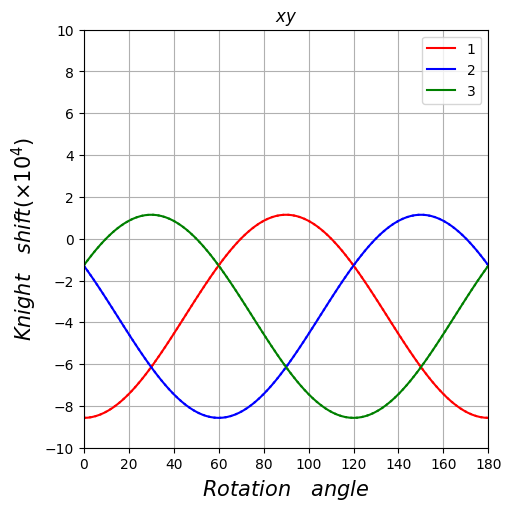

In [51]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5), constrained_layout=True)
axes.set_title(r"$xy$")
axes.set_xlabel(r"$Rotation \quad angle$", fontsize=15) 
axes.set_ylabel(r"$Knight \quad shift(\times 10^{4})$", fontsize=15)

axes.set_xlim([0, 180])
axes.set_ylim([-10, 10])
axes.set_xticks(np.linspace(0, 180, 10))
axes.set_yticks(np.linspace(-10, 10, 11))
axes.grid()

x = np.linspace(0, 180, 100)

XX = (-8.572)*10**(-4)
YY = (1.146)*10**(-4)
ZZ = 0
YZ = (8.830)*10**(-4)
C = np.cos(np.radians(x))
S = np.sin(np.radians(x))

def xy1(x):
    return 1.0*C**2*XX + 1.0*S**2*YY

def xy2(x):
    return C*(C*(0.25*XX + 0.75*YY) + S*(0.433012701892219*XX - 0.433012701892219*YY)) + S*(C*(0.433012701892219*XX - 0.433012701892219*YY) + S*(0.75*XX + 0.25*YY))

def xy3(x):
    return C*(C*(0.25*XX + 0.75*YY) + S*(-0.433012701892219*XX + 0.433012701892219*YY)) + S*(C*(-0.433012701892219*XX + 0.433012701892219*YY) + S*(0.75*XX + 0.25*YY))

def XY1(x):
    return (XX+YY)/2+(XX-YY)/2*np.cos(2*np.radians(x))

def XY2r(x):
    return (XX+YY)/2+(XX-YY)/2*np.cos(2*np.radians(x) + np.pi * 4/3 )

def XY2l(x):
    return (XX+YY)/2+(XX-YY)/2*np.cos(2*np.radians(x) - np.pi * 4/3 )

def XY3r(x):
    return (XX+YY)/2+(XX-YY)/2*np.cos(2*np.radians(x) - np.pi * 4/3 )

def XY3l(x):
    return (XX+YY)/2+(XX-YY)/2*np.cos(2*np.radians(x) + np.pi * 4/3 )


ims=[]
im1 = axes.plot(x, xy1(x)*10**(4), color='red')
im2 = axes.plot(x, xy2(x)*10**(4), color='blue')
im3 = axes.plot(x, xy3(x)*10**(4), color='green')
im4 = axes.plot(x, XY1(x)*10**(4), ":", color='red')
im5 = axes.plot(x, XY2r(x)*10**(4), ":", color='blue')
im6 = axes.plot(x, XY3r(x)*10**(4), ":", color='green')

axes.legend(['$1$','$2$', '$3$'])

plt.show()

In [52]:
n1 = 1/(3**(0.5))
n2 = 1/(3**(0.5))
n3 = 1/(3**(0.5))
t = 0
XX = Symbol('XX')
YY = Symbol('YY')
ZZ = Symbol('ZZ')
YZ = Symbol('YZ')
C = Symbol('C')
S = Symbol('S')

T = Matrix([[n1**(2)*(1-np.cos(np.radians(t)))+np.cos(np.radians(t)), n1*n2*(1-np.cos(np.radians(t)))-n3*np.sin(np.radians(t)), n1*n3*(1-np.cos(np.radians(t)))+n2*np.sin(np.radians(t))], 
            [n1*n2*(1-np.cos(np.radians(t)))+n3*np.sin(np.radians(t)), n2**(2)*(1-np.cos(np.radians(t)))+np.cos(np.radians(t)), n2*n3*(1-np.cos(np.radians(t)))-n1*np.sin(np.radians(t))], 
            [n1*n3*(1-np.cos(np.radians(t)))-n2*np.sin(np.radians(t)), n2*n3*(1-np.cos(np.radians(t)))+n1*np.sin(np.radians(t)), n3**(2)*(1-np.cos(np.radians(t)))+np.cos(np.radians(t))]])
A1 = sympy.Matrix([[XX, 0, 0], [0, YY, YZ], [0, YZ, ZZ]])
A2 = sympy.Matrix([[(XX+3*YY)/4, 3**(0.5)*(XX-YY)/4, 3**(0.5)*YZ/2], [3**(0.5)*(XX-YY)/4, (3*XX+YY)/4, -YZ/2], [3**(0.5)*YZ/2, -YZ/2, ZZ]])
A3 = sympy.Matrix([[(XX+3*YY)/4, 3**(0.5)*(YY-XX)/4, -3**(0.5)*YZ/2], [3**(0.5)*(YY-XX)/4, (3*XX+YY)/4, -YZ/2], [-3**(0.5)*YZ/2, -YZ/2, ZZ]])
h1 = sympy.Matrix([[0, S, C]])
h2 = sympy.Matrix([[0], [S], [C]])

f1 = T*A1*T**(-1)
f2 = T*A2*T**(-1)
f3 = T*A3*T**(-1)

yz1 = h1*f1*h2
yz2 = h1*f2*h2
yz3 = h1*f3*h2

print(f1)
print(f2)
print(f3)

print(yz1)
print(yz2)
print(yz3)

Matrix([[1.0*XX, 0, 0], [0, 1.0*YY, 1.0*YZ], [0, 1.0*YZ, 1.0*ZZ]])
Matrix([[0.25*XX + 0.75*YY, 0.433012701892219*XX - 0.433012701892219*YY, 0.866025403784439*YZ], [0.433012701892219*XX - 0.433012701892219*YY, 0.75*XX + 0.25*YY, -0.5*YZ], [0.866025403784439*YZ, -0.5*YZ, 1.0*ZZ]])
Matrix([[0.25*XX + 0.75*YY, -0.433012701892219*XX + 0.433012701892219*YY, -0.866025403784439*YZ], [-0.433012701892219*XX + 0.433012701892219*YY, 0.75*XX + 0.25*YY, -0.5*YZ], [-0.866025403784439*YZ, -0.5*YZ, 1.0*ZZ]])
Matrix([[C*(1.0*C*ZZ + 1.0*S*YZ) + S*(1.0*C*YZ + 1.0*S*YY)]])
Matrix([[C*(1.0*C*ZZ - 0.5*S*YZ) + S*(-0.5*C*YZ + S*(0.75*XX + 0.25*YY))]])
Matrix([[C*(1.0*C*ZZ - 0.5*S*YZ) + S*(-0.5*C*YZ + S*(0.75*XX + 0.25*YY))]])


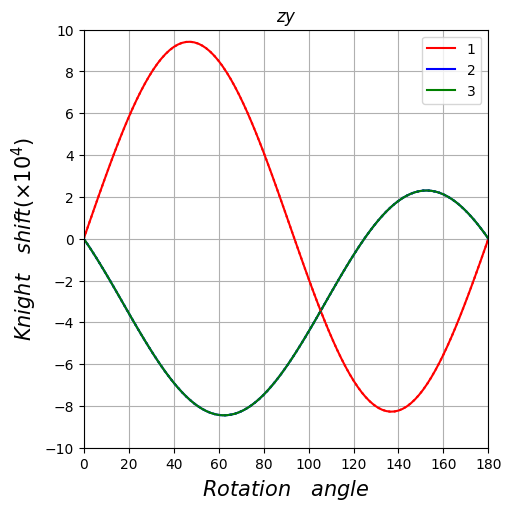

In [53]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5), constrained_layout=True)
axes.set_title(r"$zy$")
axes.set_xlabel(r"$Rotation \quad angle$", fontsize=15) 
axes.set_ylabel(r"$Knight \quad shift(\times 10^{4})$", fontsize=15)

axes.set_xlim([0, 180])
axes.set_ylim([-10, 10])
axes.set_xticks(np.linspace(0, 180, 10))
axes.set_yticks(np.linspace(-10, 10, 11))
axes.grid()

x = np.linspace(0, 180, 100)

XX = (-8.572)*10**(-4)
YY = (1.146)*10**(-4)
ZZ = 0
YZ = (8.830)*10**(-4)
C = np.cos(np.radians(x))
S = np.sin(np.radians(x))

def zy1(x):
    return C*(1.0*C*ZZ + 1.0*S*YZ) + S*(1.0*C*YZ + 1.0*S*YY)

def zy2(x):
    return C*(1.0*C*ZZ - 0.5*S*YZ) + S*(-0.5*C*YZ + S*(0.75*XX + 0.25*YY))

def zy3(x):
    return C*(1.0*C*ZZ - 0.5*S*YZ) + S*(-0.5*C*YZ + S*(0.75*XX + 0.25*YY))

def ZY1r(x):
    return (ZZ+YY)/2+(ZZ-YY)/2*np.cos(2*np.radians(x)) + YZ*np.sin(2*np.radians(x))

def ZY23r(x):
    return (4*ZZ+3*XX+YY)/8+(4*ZZ-(3*XX+YY))/8*np.cos(2*np.radians(x))-YZ/2*np.sin(2*np.radians(x))


ims=[]
im1 = axes.plot(x, zy1(x)*10**(4), color='red')
im2 = axes.plot(x, zy2(x)*10**(4), color='blue')
im3 = axes.plot(x, zy3(x)*10**(4), color='green')
im4 = axes.plot(x, ZY1r(x)*10**(4), ":", color='red')
im5 = axes.plot(x, ZY23r(x)*10**(4), ":", color='blue')
im6 = axes.plot(x, ZY23r(x)*10**(4), ":", color='green')

axes.legend(['$1$','$2$', '$3$'])

plt.show()

In [54]:
n1 = 1/(3**(0.5))
n2 = 1/(3**(0.5))
n3 = 1/(3**(0.5))
t = 0
XX = Symbol('XX')
YY = Symbol('YY')
ZZ = Symbol('ZZ')
YZ = Symbol('YZ')
C = Symbol('C')
S = Symbol('S')

T = Matrix([[n1**(2)*(1-np.cos(np.radians(t)))+np.cos(np.radians(t)), n1*n2*(1-np.cos(np.radians(t)))-n3*np.sin(np.radians(t)), n1*n3*(1-np.cos(np.radians(t)))+n2*np.sin(np.radians(t))], 
            [n1*n2*(1-np.cos(np.radians(t)))+n3*np.sin(np.radians(t)), n2**(2)*(1-np.cos(np.radians(t)))+np.cos(np.radians(t)), n2*n3*(1-np.cos(np.radians(t)))-n1*np.sin(np.radians(t))], 
            [n1*n3*(1-np.cos(np.radians(t)))-n2*np.sin(np.radians(t)), n2*n3*(1-np.cos(np.radians(t)))+n1*np.sin(np.radians(t)), n3**(2)*(1-np.cos(np.radians(t)))+np.cos(np.radians(t))]])
A1 = sympy.Matrix([[XX, 0, 0], [0, YY, YZ], [0, YZ, ZZ]])
A2 = sympy.Matrix([[(XX+3*YY)/4, 3**(0.5)*(XX-YY)/4, 3**(0.5)*YZ/2], [3**(0.5)*(XX-YY)/4, (3*XX+YY)/4, -YZ/2], [3**(0.5)*YZ/2, -YZ/2, ZZ]])
A3 = sympy.Matrix([[(XX+3*YY)/4, 3**(0.5)*(YY-XX)/4, -3**(0.5)*YZ/2], [3**(0.5)*(YY-XX)/4, (3*XX+YY)/4, -YZ/2], [-3**(0.5)*YZ/2, -YZ/2, ZZ]])
h1 = sympy.Matrix([[S, 0, C]])
h2 = sympy.Matrix([[S], [0], [C]])

f1 = T*A1*T**(-1)
f2 = T*A2*T**(-1)
f3 = T*A3*T**(-1)

zx1 = h1*f1*h2
zx2 = h1*f2*h2
zx3 = h1*f3*h2

print(f1)
print(f2)
print(f3)

print(zx1)
print(zx2)
print(zx3)

Matrix([[1.0*XX, 0, 0], [0, 1.0*YY, 1.0*YZ], [0, 1.0*YZ, 1.0*ZZ]])
Matrix([[0.25*XX + 0.75*YY, 0.433012701892219*XX - 0.433012701892219*YY, 0.866025403784439*YZ], [0.433012701892219*XX - 0.433012701892219*YY, 0.75*XX + 0.25*YY, -0.5*YZ], [0.866025403784439*YZ, -0.5*YZ, 1.0*ZZ]])
Matrix([[0.25*XX + 0.75*YY, -0.433012701892219*XX + 0.433012701892219*YY, -0.866025403784439*YZ], [-0.433012701892219*XX + 0.433012701892219*YY, 0.75*XX + 0.25*YY, -0.5*YZ], [-0.866025403784439*YZ, -0.5*YZ, 1.0*ZZ]])
Matrix([[1.0*C**2*ZZ + 1.0*S**2*XX]])
Matrix([[C*(1.0*C*ZZ + 0.866025403784439*S*YZ) + S*(0.866025403784439*C*YZ + S*(0.25*XX + 0.75*YY))]])
Matrix([[C*(1.0*C*ZZ - 0.866025403784439*S*YZ) + S*(-0.866025403784439*C*YZ + S*(0.25*XX + 0.75*YY))]])


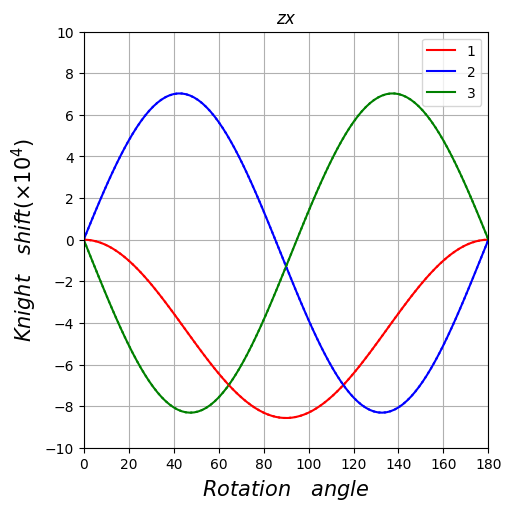

In [55]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5), constrained_layout=True)
axes.set_title(r"$zx$")
axes.set_xlabel(r"$Rotation \quad angle$", fontsize=15) 
axes.set_ylabel(r"$Knight \quad shift(\times 10^{4})$", fontsize=15)

axes.set_xlim([0, 180])
axes.set_ylim([-10, 10])
axes.set_xticks(np.linspace(0, 180, 10))
axes.set_yticks(np.linspace(-10, 10, 11))
axes.grid()

x = np.linspace(0, 180, 100)

XX = (-8.572)*10**(-4)
YY = (1.146)*10**(-4)
ZZ = 0
YZ = (8.830)*10**(-4)
C = np.cos(np.radians(x))
S = np.sin(np.radians(x))

def zx1(x):
    return 1.0*C**2*ZZ + 1.0*S**2*XX

def zx2(x):
    return C*(1.0*C*ZZ + 0.866025403784439*S*YZ) + S*(0.866025403784439*C*YZ + S*(0.25*XX + 0.75*YY))

def zx3(x):
    return C*(1.0*C*ZZ - 0.866025403784439*S*YZ) + S*(-0.866025403784439*C*YZ + S*(0.25*XX + 0.75*YY))

def ZX1(x):
    return (ZZ+XX)/2+(ZZ-XX)/2*np.cos(2*np.radians(x))

def ZX2(x):
    return (4*ZZ+XX+3*YY)/8+(4*ZZ-(XX+3*YY))/8*np.cos(2*np.radians(x))+3**(1/2)/2*YZ*np.sin(2*np.radians(x))

def ZX3(x):
    return (4*ZZ+XX+3*YY)/8+(4*ZZ-(XX+3*YY))/8*np.cos(2*np.radians(x))-3**(1/2)/2*YZ*np.sin(2*np.radians(x))


ims=[]
im1 = axes.plot(x, zx1(x)*10**(4), color='red')
im2 = axes.plot(x, zx2(x)*10**(4), color='blue')
im3 = axes.plot(x, zx3(x)*10**(4), color='green')
im4 = axes.plot(x, ZX1(x)*10**(4), ":", color='red')
im5 = axes.plot(x, ZX2(x)*10**(4), ":", color='blue')
im6 = axes.plot(x, ZX3(x)*10**(4), ":", color='green')

axes.legend(['$1$','$2$', '$3$'])

plt.show()